In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geneflow import GeneFlow
from geneflow.selection import SelectFittest
from geneflow.population import genRandIntPopulation
from geneflow.fitness import Sum
from geneflow.ops import Input, RandomMutations1D, UniformCrossover1D

Using cupy backend


In [3]:
NUM_EVOLUTIONS = 7
POPULATION_SIZE = 512 
CHROMOSOME_SIZE = 1024

SHAPE = (POPULATION_SIZE, CHROMOSOME_SIZE)

In [4]:
# generate an randon population
population = genRandIntPopulation(SHAPE, max_value=1)

In [5]:
# basic evolution graph
inputs = Input(shape=(SHAPE))
x = RandomMutations1D(max_gene_value=1, min_gene_value=0)(inputs)
outputs = UniformCrossover1D()(x)

In [6]:
gf = GeneFlow(inputs, outputs)
gf.summary()

OP (type)                                       Output Shape    Inputs
----------------------------------------------  --------------  ------------------------
input_46E735 (Input)                            (512, 1024)
randommutations1d_2FAD07 (RandomMutations1D)    []              input_46E735
uniformcrossover1d_9A6841 (UniformCrossover1D)  []              randommutations1d_2FAD07


In [7]:
fitness_function = Sum(max_sum_value=CHROMOSOME_SIZE)
evolution_strategy = SelectFittest()
gf.compile(evolution_strategy, fitness_function)

In [8]:
results = gf.evolve(population, num_evolutions=NUM_EVOLUTIONS)

In [9]:
results.display_populations(top_k=10, precision=0)

  fit score  genes [:20]
-----------  --------------------------------------------
   0.999023  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.998047  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.998047  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.998047  1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1  ...
   0.998047  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.99707   1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.99707   1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.99707   1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.99707   1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...
   0.99707   1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  ...


[autoreload of geneflow.backend failed: Traceback (most recent call last):
  File "c:\users\elie\appdata\local\programs\python\python36\lib\site-packages\IPython\extensions\autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\elie\appdata\local\programs\python\python36\lib\site-packages\IPython\extensions\autoreload.py", line 376, in superreload
    module = reload(module)
  File "c:\users\elie\appdata\local\programs\python\python36\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "c:\users\elie\appdata\local\programs\python\python36\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "d:\code\geneflow\geneflow\backend\__init__.py", line 38, in <module>
    from .load_ba

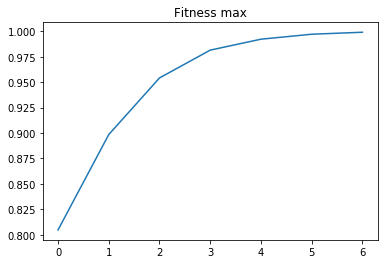

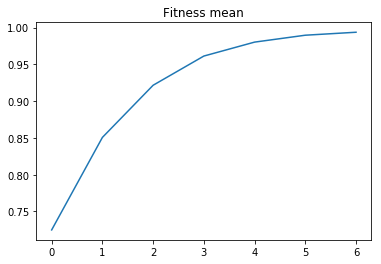

In [11]:
results.plot_metrics()